In previous sections it was shown that the depth of a network is a crucial factor that contributes in accuracy improvement (see VGG).Image Classification in TensorFlow, that the problem of vanishing or exploding gradients in deep networks can be alleviated by correct weight initialization and batch normalization. Does this mean however, that the more layers we add the more accurate the system we get is? The authors in Deep Residual Learning for Image Recognition form Microsoft research Asia  have found that accuracy gets saturated as soon as the network gets 30 layers deep. To solve this problem they introduced a new block of layers called the residual block, which adds the output of the previous layer to the output of the next layer (refer to the figure below). The Residual Net or ResNet has shown excellent results with very deep networks (greater than even 100 layers!), for example the 152-layer ResNet which won the 2015 LRVC image recognition challenge with top-5 test error of 3.57. Deeper networks such as ResNets have also proven to work better than wider ones such as those including Inception modules (e.g. GoogLeNet).



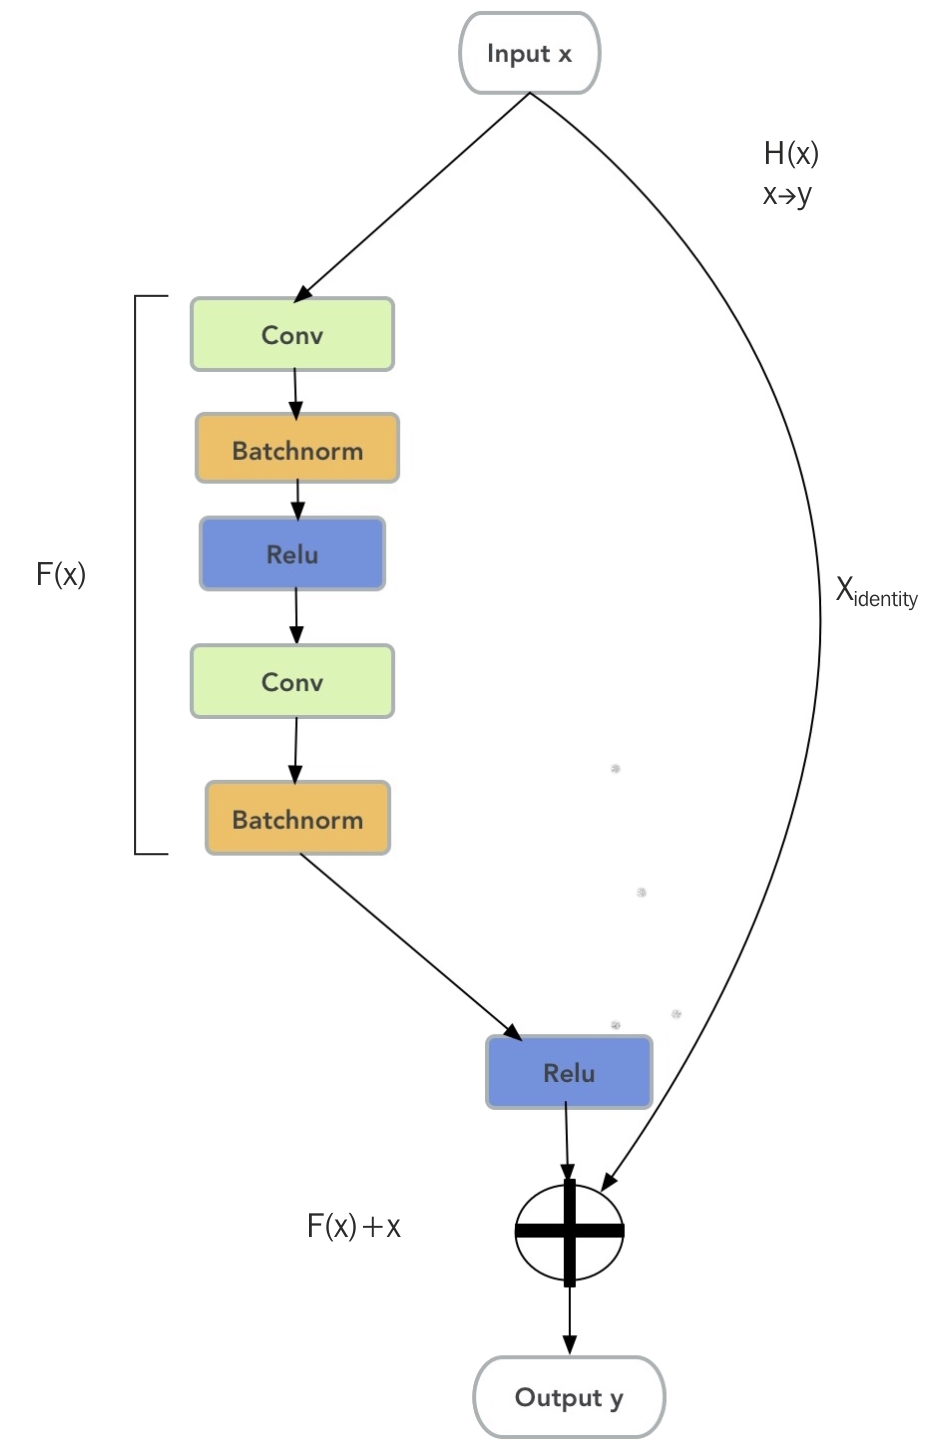

In [3]:
from IPython.display import Image
Image(filename='./images/resnet.png',height=400,width=400) 

Let us see in more detail how a residual block looks and the intuition behind its functionality. If we have an input  and an output  then there is a non linear function  that maps  to  . Suppose that the function    can be approximated by two stacked nonlinear convolution layers. Then the residual function  can be approximated as well. We can equivalently write that , where  represents two stacked non linear layers and  the identity function (input=output).

More formally, for a forward pass through the network, if  is a tensor from layer   and    and   are the weight matrices of the current and previous layers, then the input  to the next layer  is



Where    is a nonlinear activation function such as ReLu and , i.e. a two layer stacked convolution . The ReLu function can be added before or after the addition of x. The residual block should consist of 2 or more layers as a one-layer block has no apparent benefit.

To understand the intuition behind this concept let us assume that we have a shallow trained CNN and its deeper counterpart that has identical layers to that of the shallow CNN, and some more layers randomly inserted in between. In order to have a deep model that has at least similar performance to the shallow one, the additional layers must approximate identity functions. However learning an identity function with a stack of  CONV layers is harder than pushing the residual function to zero. In other words if the identity function is the optimal solution,  it is easy to achieve   and consequently .

Another way to think of this is that during training, a particular layer will learn a concept not only from the previous layer but also from the other layers before it. This should work better than learning a concept only from the previous layer.

Implementation wise, we should be careful to make sure that   and   are the same size. 

The alternative way to view the importance of the residual block is that we're going to have a "highway" (addition block) for the gradients that will avoid the vanishing gradient problem as the gradients get added! 